# DFTTK Example for AlNi3

## Introduction

In [1]:
! dfttk -h

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

usage: dfttk [-h] {run,config,db_remove,thelec,thfind,EVfind} ...

Run DFTTK jobs.

positional arguments:
  {run,config,db_remove,thelec,thfind,EVfind}
    run                 Run dfttk.
    config              Config dfttk.
    db_remove           Remove data in MongoDb.
    thelec              Postprocess DFTTK results after DFT job completed.
    thfind              Check the dfttk DFT calculation results followed by
                        calling the 'thelec' module to get thermodynamic
                        properties when the option '-get' is given.
    EVfind              Find the metadata tags that have 0 K static calculaton
                        finished.

optional arguments:
  -h, --help            show this help message and exit


## Run DFTTK

### Input
* Structure file of AlNi3 (POSCAR.AlNi3)

```
Al1 Ni3
1.0
3.561084 0.000000 0.000000
0.000000 3.561084 0.000000
0.000000 0.000000 3.561084
Al Ni
1 3
direct
0.000000 0.000000 0.000000 Al
0.500000 0.500000 0.000000 Ni
0.500000 0.000000 0.500000 Ni
0.000000 0.500000 0.500000 Ni 
```
* Setting file (SETTINGS.yaml)

```yaml
#float, the mimimum of temperature in QHA process, e.g. 5
t_min : 5

#float, the maximum of temperature in QHA process, e.g. 2000
t_max : 1000

#float, the step of temperature in QHA process, e.g. 5
t_step : 5

phonon : True

#If the phonon is True, you must set this value
phonon_supercell_matrix : 'atoms'

#The following two parameters is used to when phomon_supercel_matrix is a string
#phonon_supercell_matrix_min/max determines the range of the type
#units: number of atoms for 'atoms', A and A^3 for 'lattice' and 'volume', respectively
phonon_supercell_matrix_min : 30
phonon_supercell_matrix_max : 130
```
Prepare POSCAR and SETTINGS.yaml file and put them in the same directory. Then run following commands to start the workflow.


### DFTTK run module



Use `-wf` to specify the workflow to run, here we use `robust` workflow. Use `-f` to specify the strucutre file, here the name of the structure file is `POSCAR`. Use `-s` to specify the setting file, here the setting file is `SETTINGS.yaml`. Use -l to launch the workflow to launchpad. For more options, please refer to `dfttk run -h`



In [1]:
! dfttk run -wf robust -f POSCAR.AlNi3 -s SETTINGS -l

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

2021-10-15 09:49:13,029 INFO Added a workflow. id_map: {-4: 6342, -3: 6343, -2: 6344, -1: 6345}


To launch the DFT batch job in the computers that VASP installed, you can use `qlaunch singleshot`

To manage workflow and check the status of your work, you can use `lpad` command. For more options, please refer to `lpad -h`

In [2]:
! lpad get_wflows -s READY

[
    {
        "state": "READY",
        "name": "AlNi3:EV_QHA--6344",
        "created_on": "2021-10-15T13:49:12.927000",
        "states_list": "W-W-W-REA"
    },
    {
        "state": "READY",
        "name": "AlNi:EV_QHA--6338",
        "created_on": "2021-10-15T13:47:49.914000",
        "states_list": "W-W-W-REA"
    },
    {
        "state": "READY",
        "name": "Al3Ni5:EV_QHA--6336",
        "created_on": "2021-10-15T13:46:04.795000",
        "states_list": "W-W-W-REA"
    },
    {
        "state": "READY",
        "name": "Al3Ni:EV_QHA--6330",
        "created_on": "2021-10-15T13:44:20.520000",
        "states_list": "W-W-W-REA"
    },
    {
        "state": "READY",
        "name": "Ni:EV_QHA--6328",
        "created_on": "2021-10-15T13:29:19.189000",
        "states_list": "W-W-W-REA"
    }
]


## Plot thermodynamic properties

Use `dfttk thfind` to check the completed task.

In [1]:
! dfttk thfind

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': '428621f2-f44f-4c92-b307-04a89c77da5f'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE
{'tag': 'a715a62f-bfa7-4d95-bffb-41d56865c488'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE#0
{'tag': '6b23d6a5-d15c-46de-be2f-f021159e852d'}, phonon:  8, static:  8, SN:  52, qha_phonon: T, Zn8Pd5_I-43m_217PBE
{'tag': 'fa5e4e62-91b0-4c62-acff-26ae851da38b'}, phonon:  9, static:  9, SN:  33, qha_phonon: T, ZnPd10_P-1_2PBE_FM
{'tag': '76dd7e4c-9c8e-4f8e-8083-b4aaa6218eb9'}, phonon:  8, static:  8, SN:  27, qha_phonon: F, ZnPd8_P-31m_162PBE_FM
{'tag': '3c01629a-b287-41f5-8826-d77912f54177'}, phonon:  7, static:  8, SN:  64, qha_phonon: T, Al_Fm-3m_225PBE
{'tag': 'db521c56-bd17-4b15-9887-ff964f0c6f7c'}, phonon:  7, static:  7, SN:  90, qha_phonon: T, Al3Ru2_I4.mmm_139PBE
{'tag': '48623a91-47ac-4054-b46b

Check the tag for the workflow for Al. Then use `dfttk thfind` to plot all thermodynamic properties based on DFTTK results. For more options, please refer to ` dfttk thfind -h` 

In [2]:
! dfttk thfind -tag eea4e9bc-e71a-4ba8-ab22-3d99c20750dc -get -plot DFTTK -fitF -expt ExptData.json

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': 'eea4e9bc-e71a-4ba8-ab22-3d99c20750dc'}, phonon:  7, static:  7, SN:  32, qha_phonon: T, AlNi3_Pm-3m_221PBE_FM

1/1 qha_phonon successful under the given searching conditions.


Postprocess for thermodynamic properties, Seebeck, Lorenz number etc.

Full Formula (Al1 Ni3)
Reduced Formula: AlNi3
abc   :   3.432314   3.432314   3.432314
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Al    0    0    0      -0.009
  1  Ni    0.5  0.5  0       0.29
  2  Ni    0.5  0    0.5     0.297
  3  Ni    0    0.5  0.5     0.18


niggli reduced structure Full Formula (Al1 Ni3)
Reduced Formula: AlNi3
abc   :   3.432314   3.432314   3.432314
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Al    

The figures are in folder `AlNi3_Pm-3m_221PBE_FM/figures`

Heat_capacities_300.png


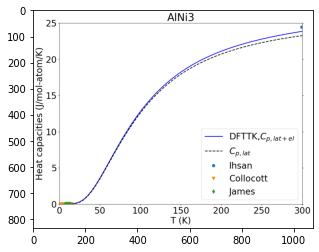

Bulk_modulus.png


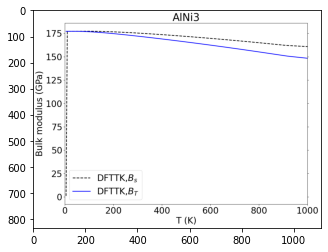

LTC.png


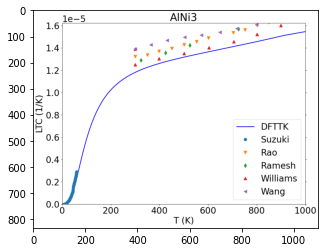

Effective_charge_carrier_concentration_100.png


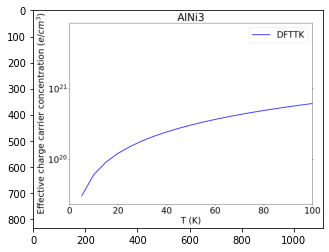

Heat_capacities_1000_oT2.png


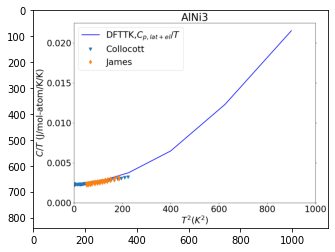

Lorenz_number.png


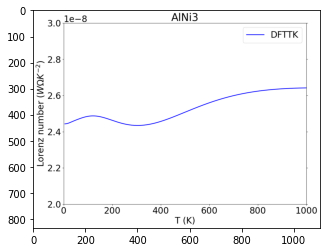

Gibbs_energy-H298.png


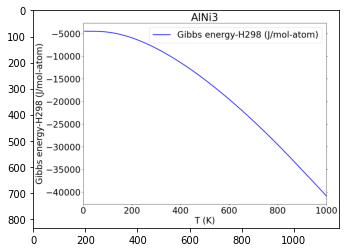

Debye_temperature.png


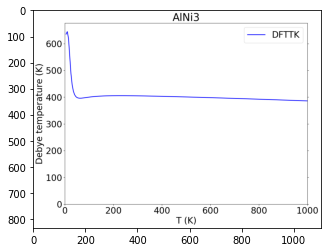

Heat_capacities_100_oT2.png


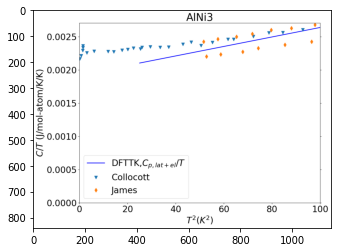

Seebeck_coefficients.png


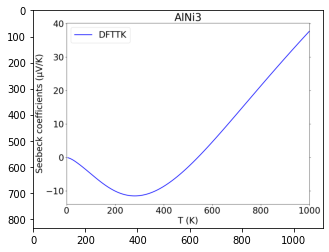

Effective_charge_carrier_concentration.png


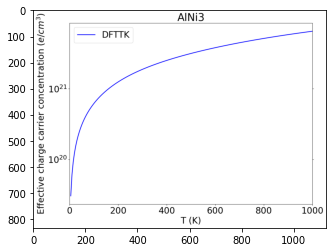

Absolute_thermal_electric_force.png


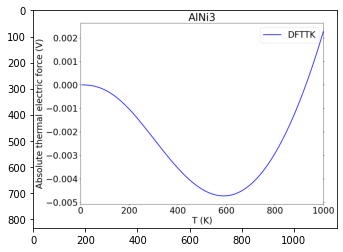

Gruneisen_coefficient.png


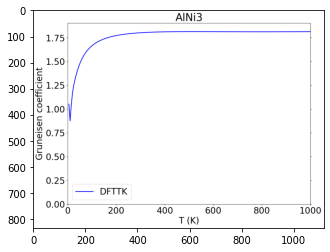

0_K_total_energies.png


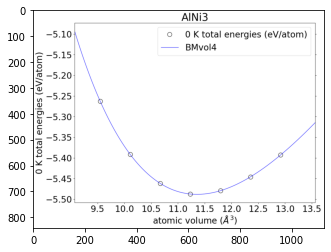

Debye_temperature_70.png


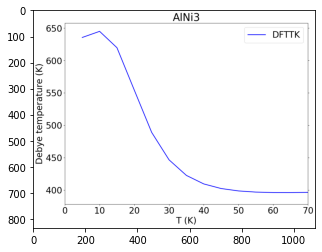

Enthalpy-H298.png


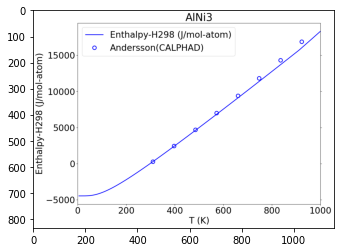

Heat_capacities_300_el_oT.png


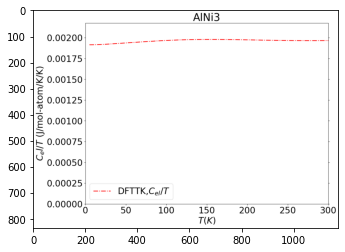

Atomic_volume.png


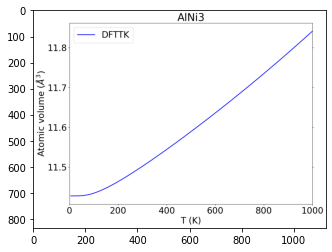

Entropy.png


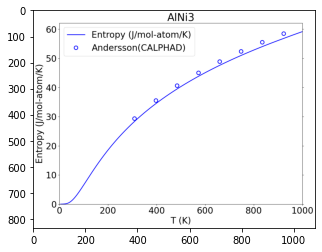

Heat_capacities.png


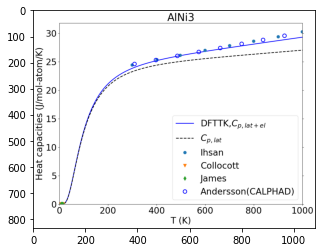

In [3]:
import os
import matplotlib.image as im
import matplotlib.pyplot as plt
%matplotlib inline
path_name='AlNi3_Pm-3m_221PBE_FM/figures'
for item in os.listdir(path=path_name):
    print(item)
    img = im.imread(os.path.join(path_name,item))
    plt.imshow(img)
    plt.show()

You can also specify the figure that you would like to plot.

In addtion to figures, original data are generated by `thfind`